<a href="https://colab.research.google.com/github/nehansa2003/Student-StressLevel-Prediction-Analysis/blob/main/real_world_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The goal of this project is to predict a student's stress level using the information given in the dataset. The dataset contains details about a student’s lifestyle and academic situation. These factors can influence how stressed a student feels.

**Target to Predict (Output):**
Stress Level class – how stressed the student is.

**Information Used to Predict Stress (Input Features):**

*Sleep Quality – how well the student sleeps.

*Headache Frequency – how often the student gets headaches.

*Academic Performance – how well the student performs in studies.

*Study Load – how heavy or demanding their study schedule is.

*Extracurricular Activities – how often the student joins activities outside academics.

**Using these five factors, we try to predict how stressed a student might be.**



In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
#load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Student Stress Factors (2).csv")
df.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [3]:
#get the dataset structure
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [4]:
#get the descriptive statistics of the dataset
df.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3.125000,2.182692,3.326923,2.750000,2.682692,2.875000
std,1.099023,1.247459,1.061158,1.372381,1.470745,1.357825
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
#check get the the null value count
df.isnull().sum()


,0
Kindly Rate your Sleep Quality 😴,0
How many times a week do you suffer headaches 🤕?,0
How would you rate you academic performance 👩‍🎓?,0
how would you rate your study load?,0
How many times a week you practice extracurricular activities 🎾?,0
How would you rate your stress levels?,0


In [6]:
#check duplicate values and get count
df.duplicated().sum()

np.int64(416)

In [7]:
# rename columns
df = df.rename(columns={
    "Kindly Rate your Sleep Quality 😴": "Sleep_Quality",
    "How many times a week do you suffer headaches 🤕?": "Headaches",
    "How would you rate you academic performance 👩‍🎓?": "Academic_Performance",
    "how would you rate your study load?": "Study_Load",
    "How many times a week you practice extracurricular activities 🎾?": "Extracurricular",
    "How would you rate your stress levels?": "Stress_Level"
})


# Detect ouliers

In [8]:
#calculate the basic measures and detect outliers of each column
for col in df.columns:
  print("Column name:",col)

  #calculate mean,median,Q1,Q3.IQR, lower limit, upper limit
  mean=df[col].mean()
  median=df[col].median()
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR

  # Detect Outliers
  outliers=df[(df[col]<lower_limit) | (df[col]>upper_limit)]

  print(f"Mean: {mean}")
  print(f"Median: {median}")
  print(f"Q1 (25%): {Q1}")
  print(f"Q3 (75%): {Q3}")
  print(f"IQR (Q3 - Q1): {IQR}")
  print(f"Lower Limit: {lower_limit}")
  print(f"Upper Limit: {upper_limit}")
  print(f"Number of Outliers: {len(outliers)}")
  print("\n")

Column name: Sleep_Quality
Mean: 3.125
Median: 3.0
Q1 (25%): 2.0
Q3 (75%): 4.0
IQR (Q3 - Q1): 2.0
Lower Limit: -1.0
Upper Limit: 7.0
Number of Outliers: 0


Column name: Headaches
Mean: 2.1826923076923075
Median: 2.0
Q1 (25%): 1.0
Q3 (75%): 3.0
IQR (Q3 - Q1): 2.0
Lower Limit: -2.0
Upper Limit: 6.0
Number of Outliers: 0


Column name: Academic_Performance
Mean: 3.326923076923077
Median: 3.0
Q1 (25%): 3.0
Q3 (75%): 4.0
IQR (Q3 - Q1): 1.0
Lower Limit: 1.5
Upper Limit: 5.5
Number of Outliers: 35


Column name: Study_Load
Mean: 2.75
Median: 2.5
Q1 (25%): 2.0
Q3 (75%): 4.0
IQR (Q3 - Q1): 2.0
Lower Limit: -1.0
Upper Limit: 7.0
Number of Outliers: 0


Column name: Extracurricular
Mean: 2.6826923076923075
Median: 3.0
Q1 (25%): 1.0
Q3 (75%): 4.0
IQR (Q3 - Q1): 3.0
Lower Limit: -3.5
Upper Limit: 8.5
Number of Outliers: 0


Column name: Stress_Level
Mean: 2.875
Median: 3.0
Q1 (25%): 2.0
Q3 (75%): 4.0
IQR (Q3 - Q1): 2.0
Lower Limit: -1.0
Upper Limit: 7.0
Number of Outliers: 0




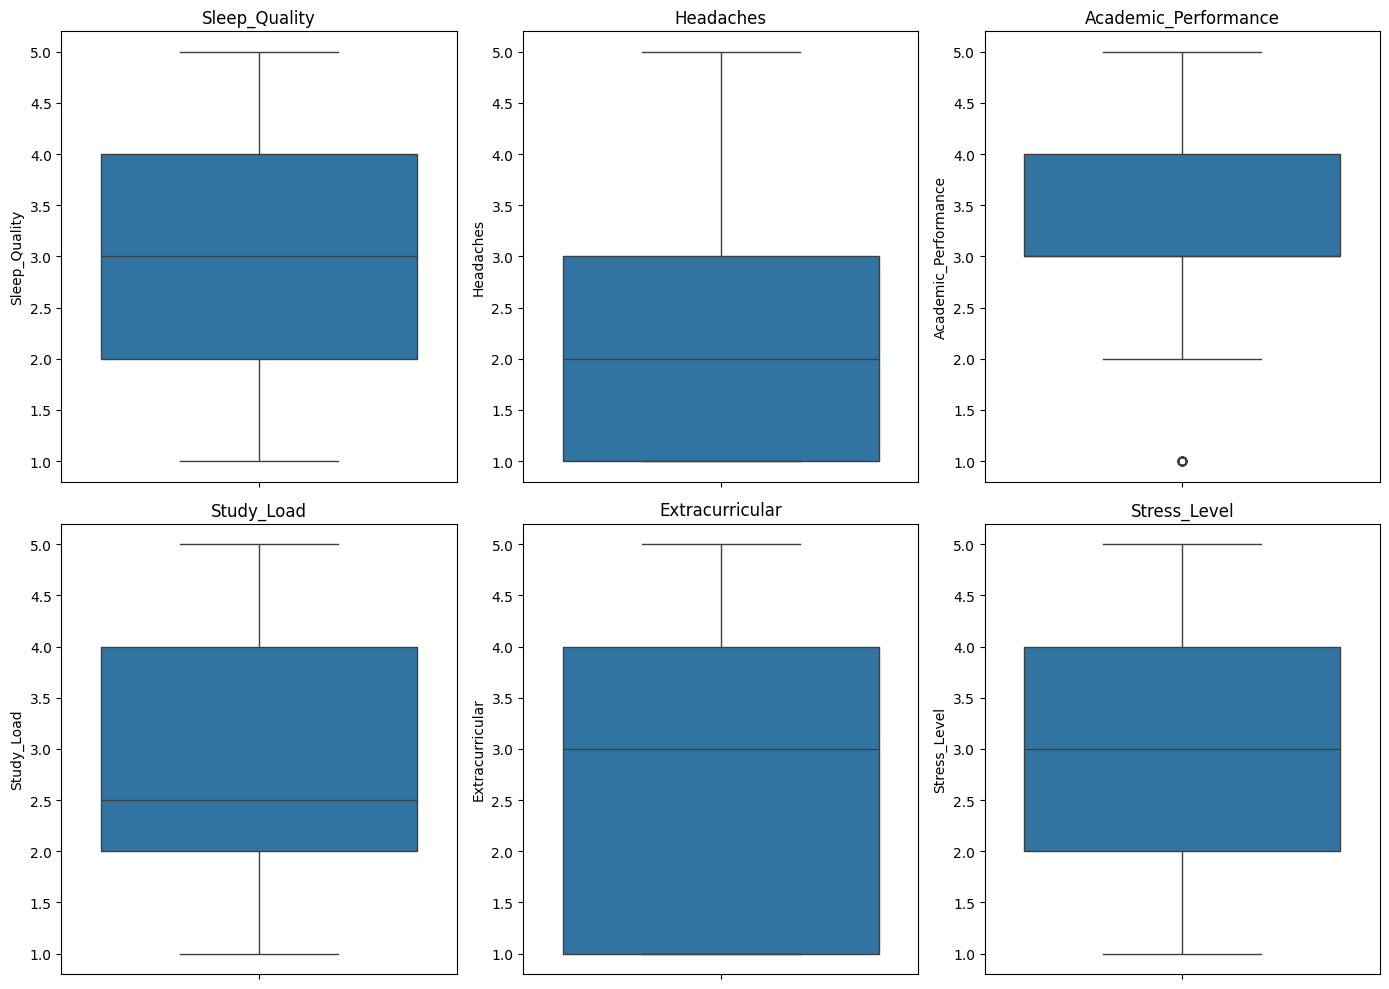

In [9]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14, 10))

for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Although the IQR method flagged 35 values of Academic Performance = 1 as outliers, these represent legitimate low-performance ratings within a Likert scale (1–5). Since psychological and self-report datasets naturally contain extreme but meaningful responses, these values were retained and not treated as erroneous outliers.

## **Normalize or Standardize Features**

Standardization (Z-score)

z=(x−μ​)/σ

µ = mean

σ = standard deviation



In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df_standardized = df.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df_standardized.head()


,Sleep_Quality,Headaches,Academic_Performance,Study_Load,Extracurricular,Stress_Level
0,-0.113847,-0.948994,-0.308378,0.911703,-0.464628,0.092148
1,0.796928,-0.948994,-1.251652,0.182341,0.215954,-0.645033
2,-1.024622,-0.948994,-1.251652,-1.276384,0.896536,0.829329
3,-0.113847,-0.146593,-0.308378,-0.547022,0.215954,0.092148
4,-1.024622,0.655809,-2.194927,1.641065,1.577118,0.092148


Normalization (0–1)

x′=(max−min)/(x−min​)

In [11]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df_normalized = df.copy()
df_normalized[numeric_cols] = normalizer.fit_transform(df[numeric_cols])

df_normalized.head()


,Sleep_Quality,Headaches,Academic_Performance,Study_Load,Extracurricular,Stress_Level
0,0.50,0.00,0.50,0.75,0.25,0.50
1,0.75,0.00,0.25,0.50,0.50,0.25
2,0.25,0.00,0.25,0.00,0.75,0.75
3,0.50,0.25,0.50,0.25,0.50,0.50
4,0.25,0.50,0.00,1.00,1.00,0.50


Final Cleaned Dataset

No missing values

No duplicates

Outliers handled

All features scaled



In [12]:
#df.to_csv("cleaned_student_stress_dataset.csv", index=False)
df=df_normalized


In [13]:
#load the dataset
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_student_stress_dataset.csv')
df.head()

,Sleep_Quality,Headaches,Academic_Performance,Study_Load,Extracurricular,Stress_Level
0,0.50,0.00,0.50,0.75,0.25,0.50
1,0.75,0.00,0.25,0.50,0.50,0.25
2,0.25,0.00,0.25,0.00,0.75,0.75
3,0.50,0.25,0.50,0.25,0.50,0.50
4,0.25,0.50,0.00,1.00,1.00,0.50


# **Analytics Framework**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


new features:

Study Efficiency = Academic Performance / Study Load

Sleep–Stress Risk = Headache Frequency / Sleep Quality

Study_Burden_Index = Study_Load * (6 - Academic_Performance)

Study_load_sleep_balance=Study_Load/(Sleep_Quality +1)


In [15]:
df['Study_Efficiency'] = df['Academic_Performance'] / (df['Study_Load'] + 1)
df['Sleep_Stress_Risk'] = df['Headaches'] / (df['Sleep_Quality'] + 1)
df["Study_Burden_Index"] = df["Study_Load"] * (6 - df["Academic_Performance"])
df["Study_load_sleep_balance"]=df["Study_Load"]/(df["Sleep_Quality"] +1)




In [16]:
df.head()

,Sleep_Quality,Headaches,Academic_Performance,Study_Load,Extracurricular,Stress_Level,Study_Efficiency,Sleep_Stress_Risk,Study_Burden_Index,Study_load_sleep_balance
0,0.50,0.00,0.50,0.75,0.25,0.50,0.285714,0.000000,4.125,0.500000
1,0.75,0.00,0.25,0.50,0.50,0.25,0.166667,0.000000,2.875,0.285714
2,0.25,0.00,0.25,0.00,0.75,0.75,0.250000,0.000000,0.000,0.000000
3,0.50,0.25,0.50,0.25,0.50,0.50,0.400000,0.166667,1.375,0.166667
4,0.25,0.50,0.00,1.00,1.00,0.50,0.000000,0.400000,6.000,0.800000


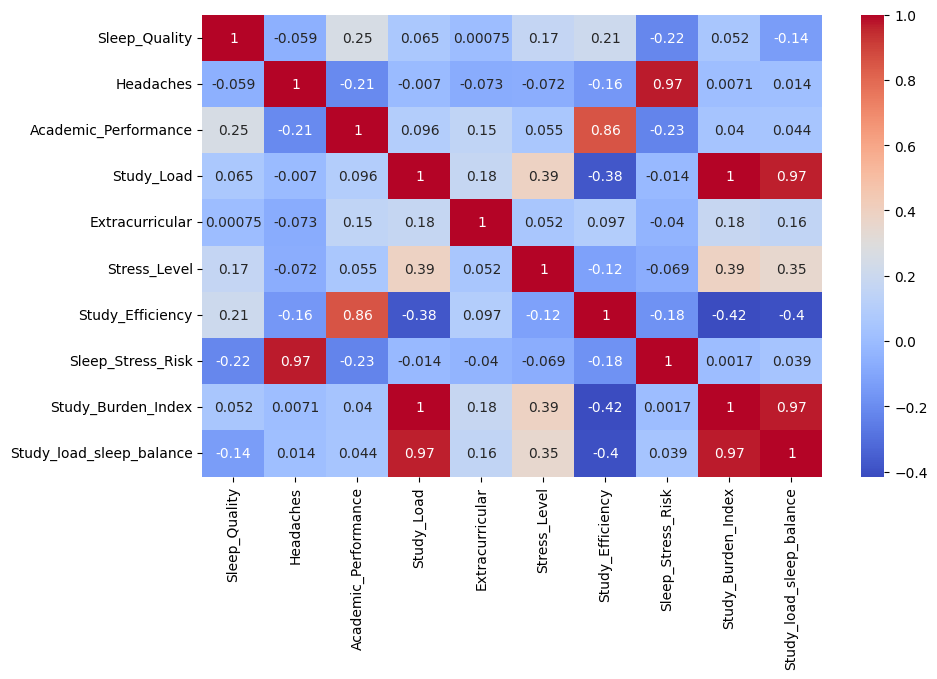

In [17]:
# correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Define Features (X) and Target (y)

In [18]:
X = df[['Sleep_Quality', 'Headaches', 'Academic_Performance', 'Study_Load', 'Extracurricular','Study_Efficiency','Sleep_Stress_Risk','Study_Burden_Index','Study_load_sleep_balance']]

y = df['Stress_Level']



# Split Train–Test Data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [20]:
print(y_test)

217    0.25
20     0.25
306    0.50
175    0.25
346    0.25
       ... 
390    0.50
330    0.50
48     0.50
425    0.25
8      0.00
Name: Stress_Level, Length: 104, dtype: float64


# Scale the Features

In [21]:
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using the already learned parameters
X_test_scaled = scaler.transform(X_test)


# Train Multiple Models

**Model 1: Linear Regression**

In [22]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred_linear=linear.predict(X_test_scaled)

**Model 2: Ridge Regression**

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge=ridge.predict(X_test_scaled)

**Model 3: Lasso Regression**

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso=lasso.predict(X_test_scaled)

**Model 4: Decision Tree Regressor**

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)  # tune depth to show overfitting
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test_scaled)


**Model 5: Random Forest Regressor**

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


**Model 6: Gradient Boosting Regressor**

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)


# Evaluate All Models

In [28]:
def evaluate(model, name):
    y_pred_train = model.predict(X_train_scaled if 'Tree' not in name else X_train)
    y_pred_test = model.predict(X_test_scaled if 'Tree' not in name else X_test)

    return {
        'Model': name,
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test)
    }

results = []
results.append(evaluate(linear, 'Linear Regression'))
results.append(evaluate(ridge, 'Ridge Regression'))
results.append(evaluate(lasso, 'Lasso Regression'))
results.append(evaluate(dt, 'Decision Tree Regressor'))
results.append(evaluate(rf, 'Random Forest Regressor'))
results.append(evaluate(gbr, 'Gradient Boosting Regressor'))

model_results = pd.DataFrame(results)
model_results


,Model,Train R²,Test R²,Train MSE,Test MSE
0,Linear Regression,0.207044,0.265791,0.091197,0.084441
1,Ridge Regression,0.190054,0.252512,0.093151,0.085968
2,Lasso Regression,0.162519,0.204126,0.096318,0.091533
3,Decision Tree Regressor,0.478703,0.406095,0.059954,0.068304
4,Random Forest Regressor,0.951373,0.912621,0.005593,0.010049
5,Gradient Boosting Regressor,0.832651,0.705047,0.019247,0.033922


# Interpretation: Checking Overfitting & Underfitting

**Overfitting**

When a model learns the training data too well, including noise and minor fluctuations, so it performs poorly on new/unseen data.

Train performance >> Test performance (large gap between Train R² and Test R²)

Train error is very low, but test error is high.


**Underfitting**

When a model is too simple to capture the underlying patterns in the data, so it performs poorly on both training and test data.

Train performance is low, and Test performance is also low

Train error and test error are both high.

Sometimes Test R² may be slightly higher than Train R² if the model is unstable.

# Visualization

**Actual vs Predicted plots**

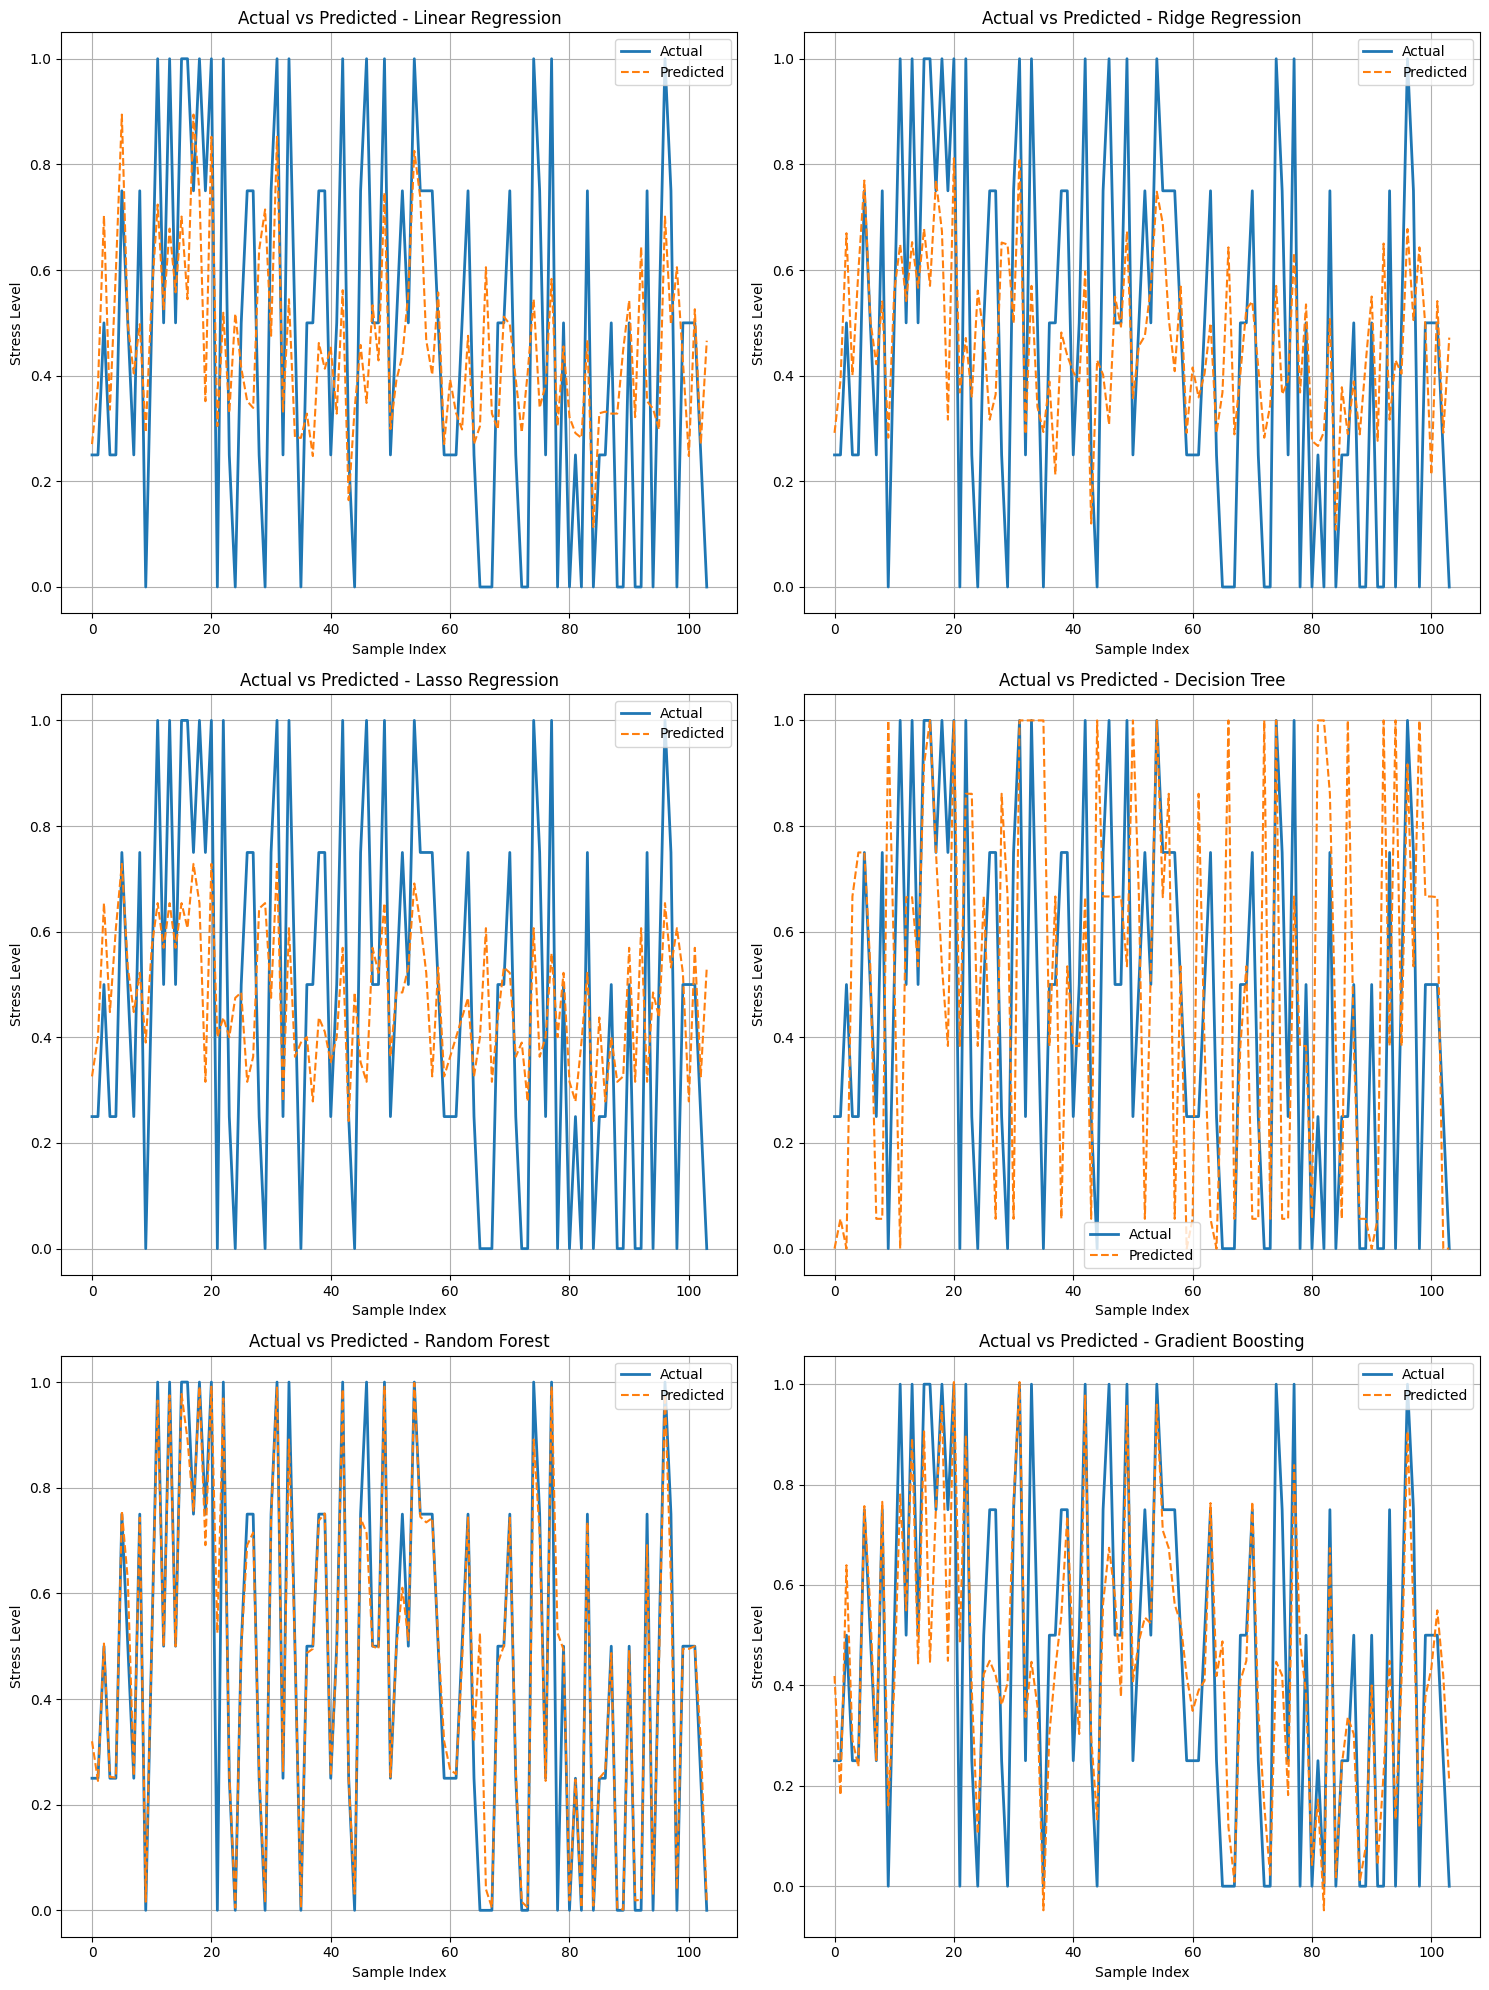

In [29]:
# Dictionary of model predictions
models = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr
}

x = range(len(y_test))

# Number of models
num_models = len(models)

# Create subplots
plt.figure(figsize=(15, 20))

for i, (model_name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    plt.plot(x, y_test, label='Actual', linewidth=2)
    plt.plot(x, preds, label='Predicted', linestyle='--')
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.xlabel("Sample Index")
    plt.ylabel("Stress Level")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


When comparing the Actual vs Predicted plots for all six models, the Random Forest Regressor clearly provides the best performance. In its subplot, the predicted values closely follow the actual stress level curve with very small deviations. The predictions almost overlap with the actual line, showing that the model captures the true pattern of the data much more accurately than the other models. This visual alignment confirms the numerical results, where Random Forest achieved the highest Test R² (0.91) and the lowest Test MSE (0.010). Therefore, among all the models tested, the Random Forest Regressor is the best-fitting model, providing the most reliable and stable predictions for stress level.

**Prediction Error Plots**

In [30]:
models = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gbr
}


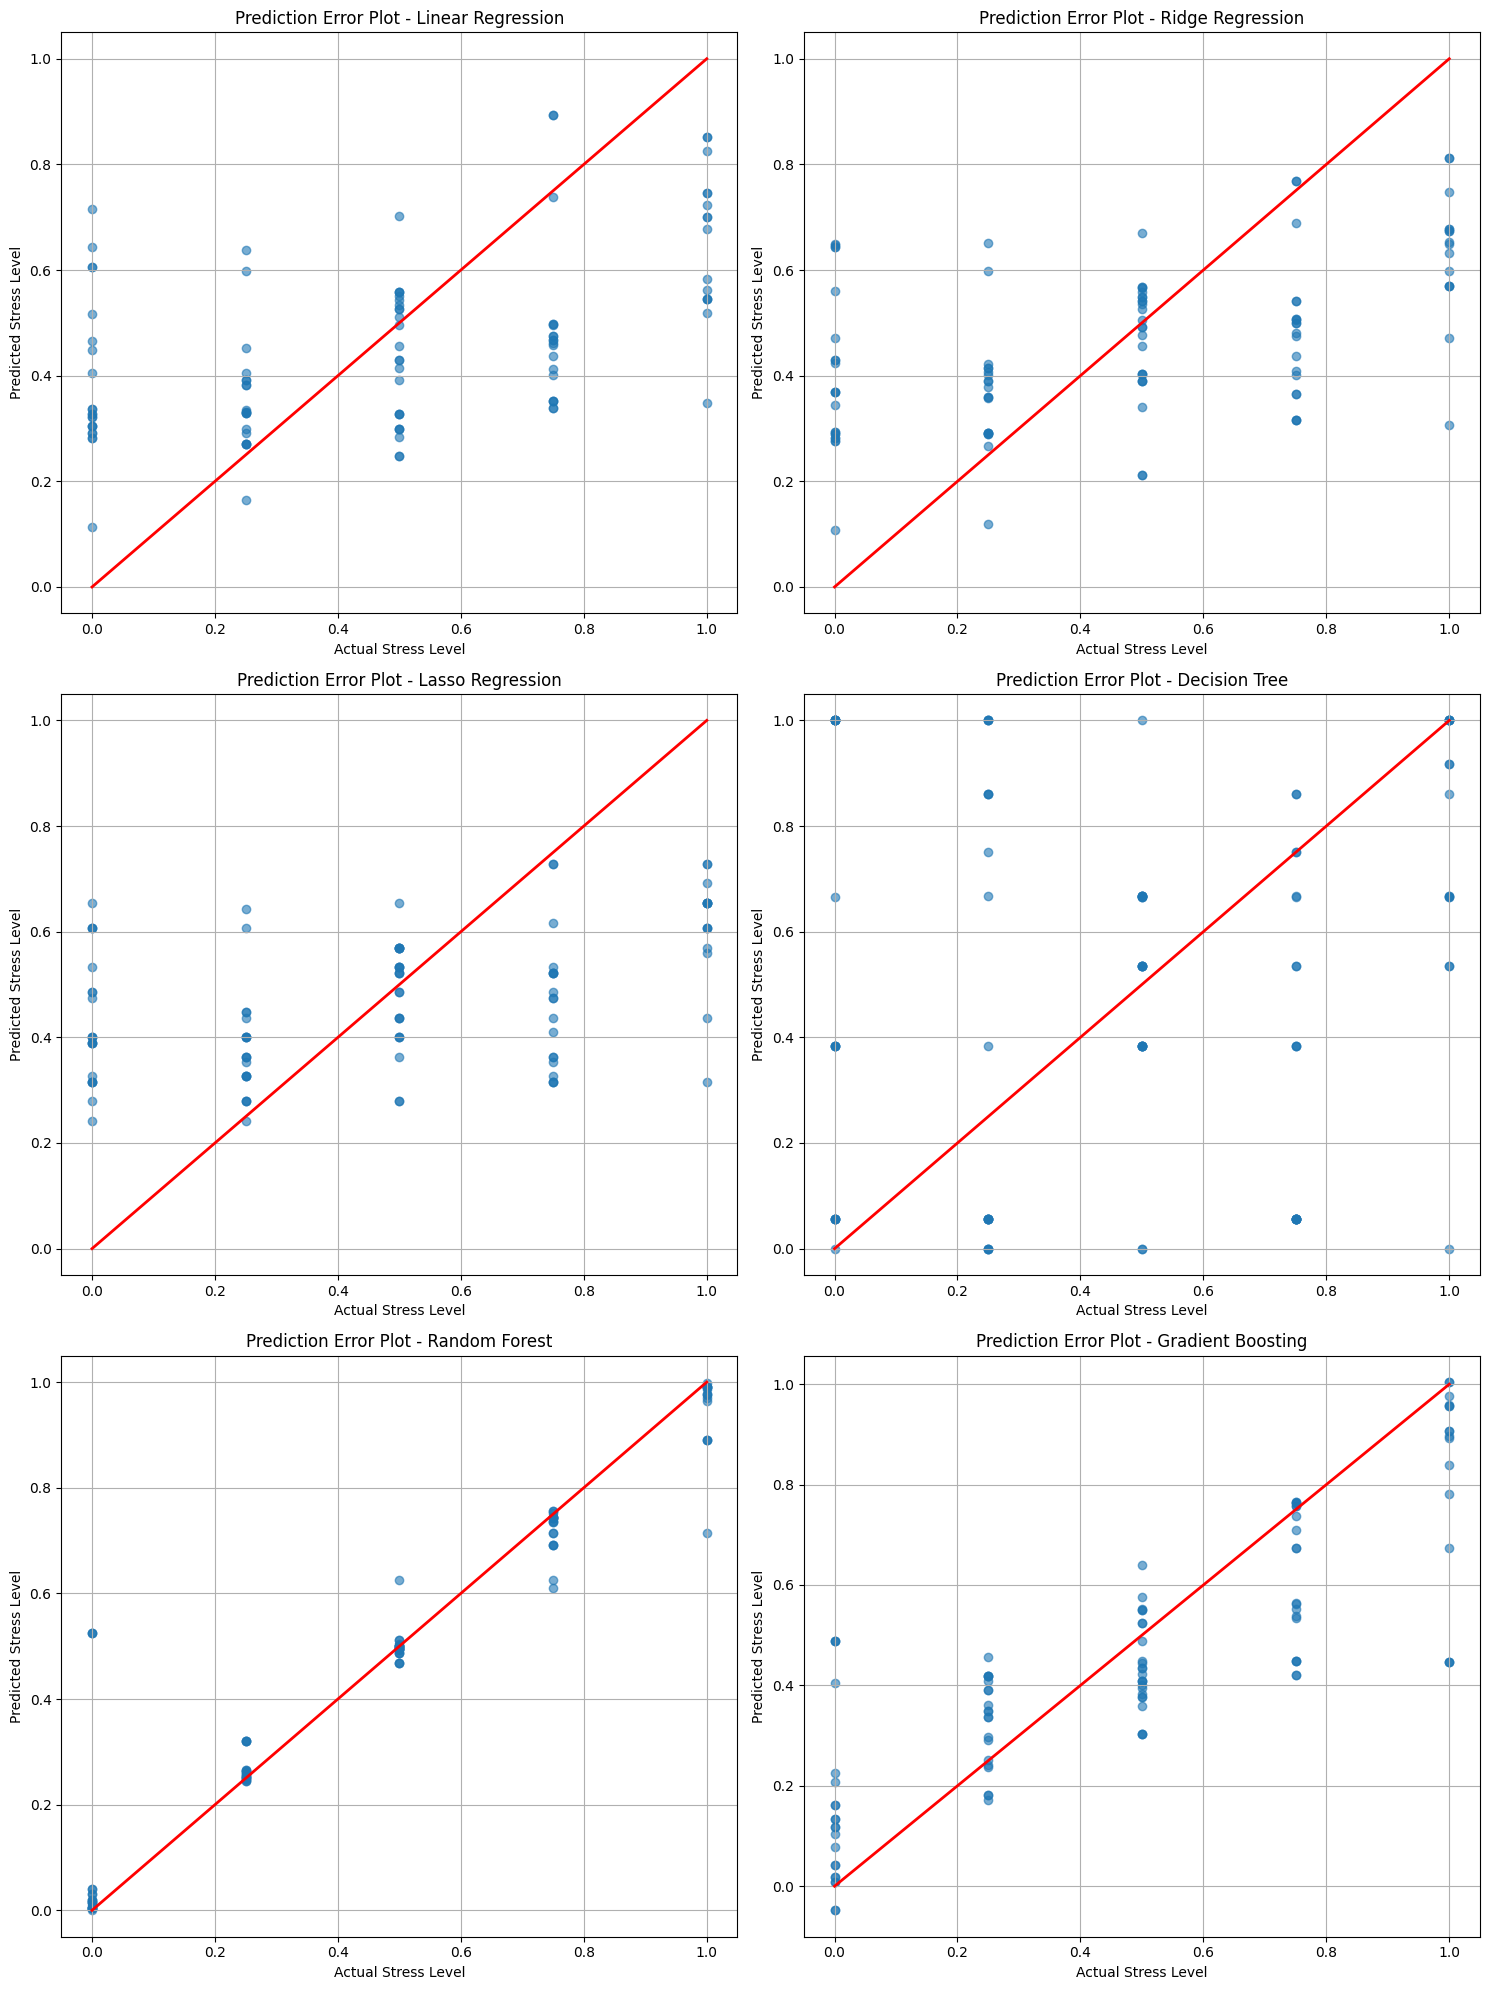

In [31]:
plt.figure(figsize=(15, 20))

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(y_test, preds, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color='red', linewidth=2)
    plt.title(f"Prediction Error Plot - {name}")
    plt.xlabel("Actual Stress Level")
    plt.ylabel("Predicted Stress Level")
    plt.grid(True)

plt.tight_layout()
plt.show()

When comparing the prediction error plots for all models, the Random Forest Regressor clearly shows the strongest performance. In its subplot, the points lie very close to the red diagonal line, which represents perfect predictions where the actual and predicted stress levels match exactly. The Random Forest model shows the smallest spread of points and the tightest clustering around this line, meaning it makes fewer large errors compared to the others. This indicates higher accuracy and lower prediction error. The strong alignment of points in the Random Forest plot visually confirms the numerical results, where it achieved the highest R² score and the lowest MSE. Therefore, the Random Forest Regressor is the best-performing model among all those evaluated.

**Error Distribution**

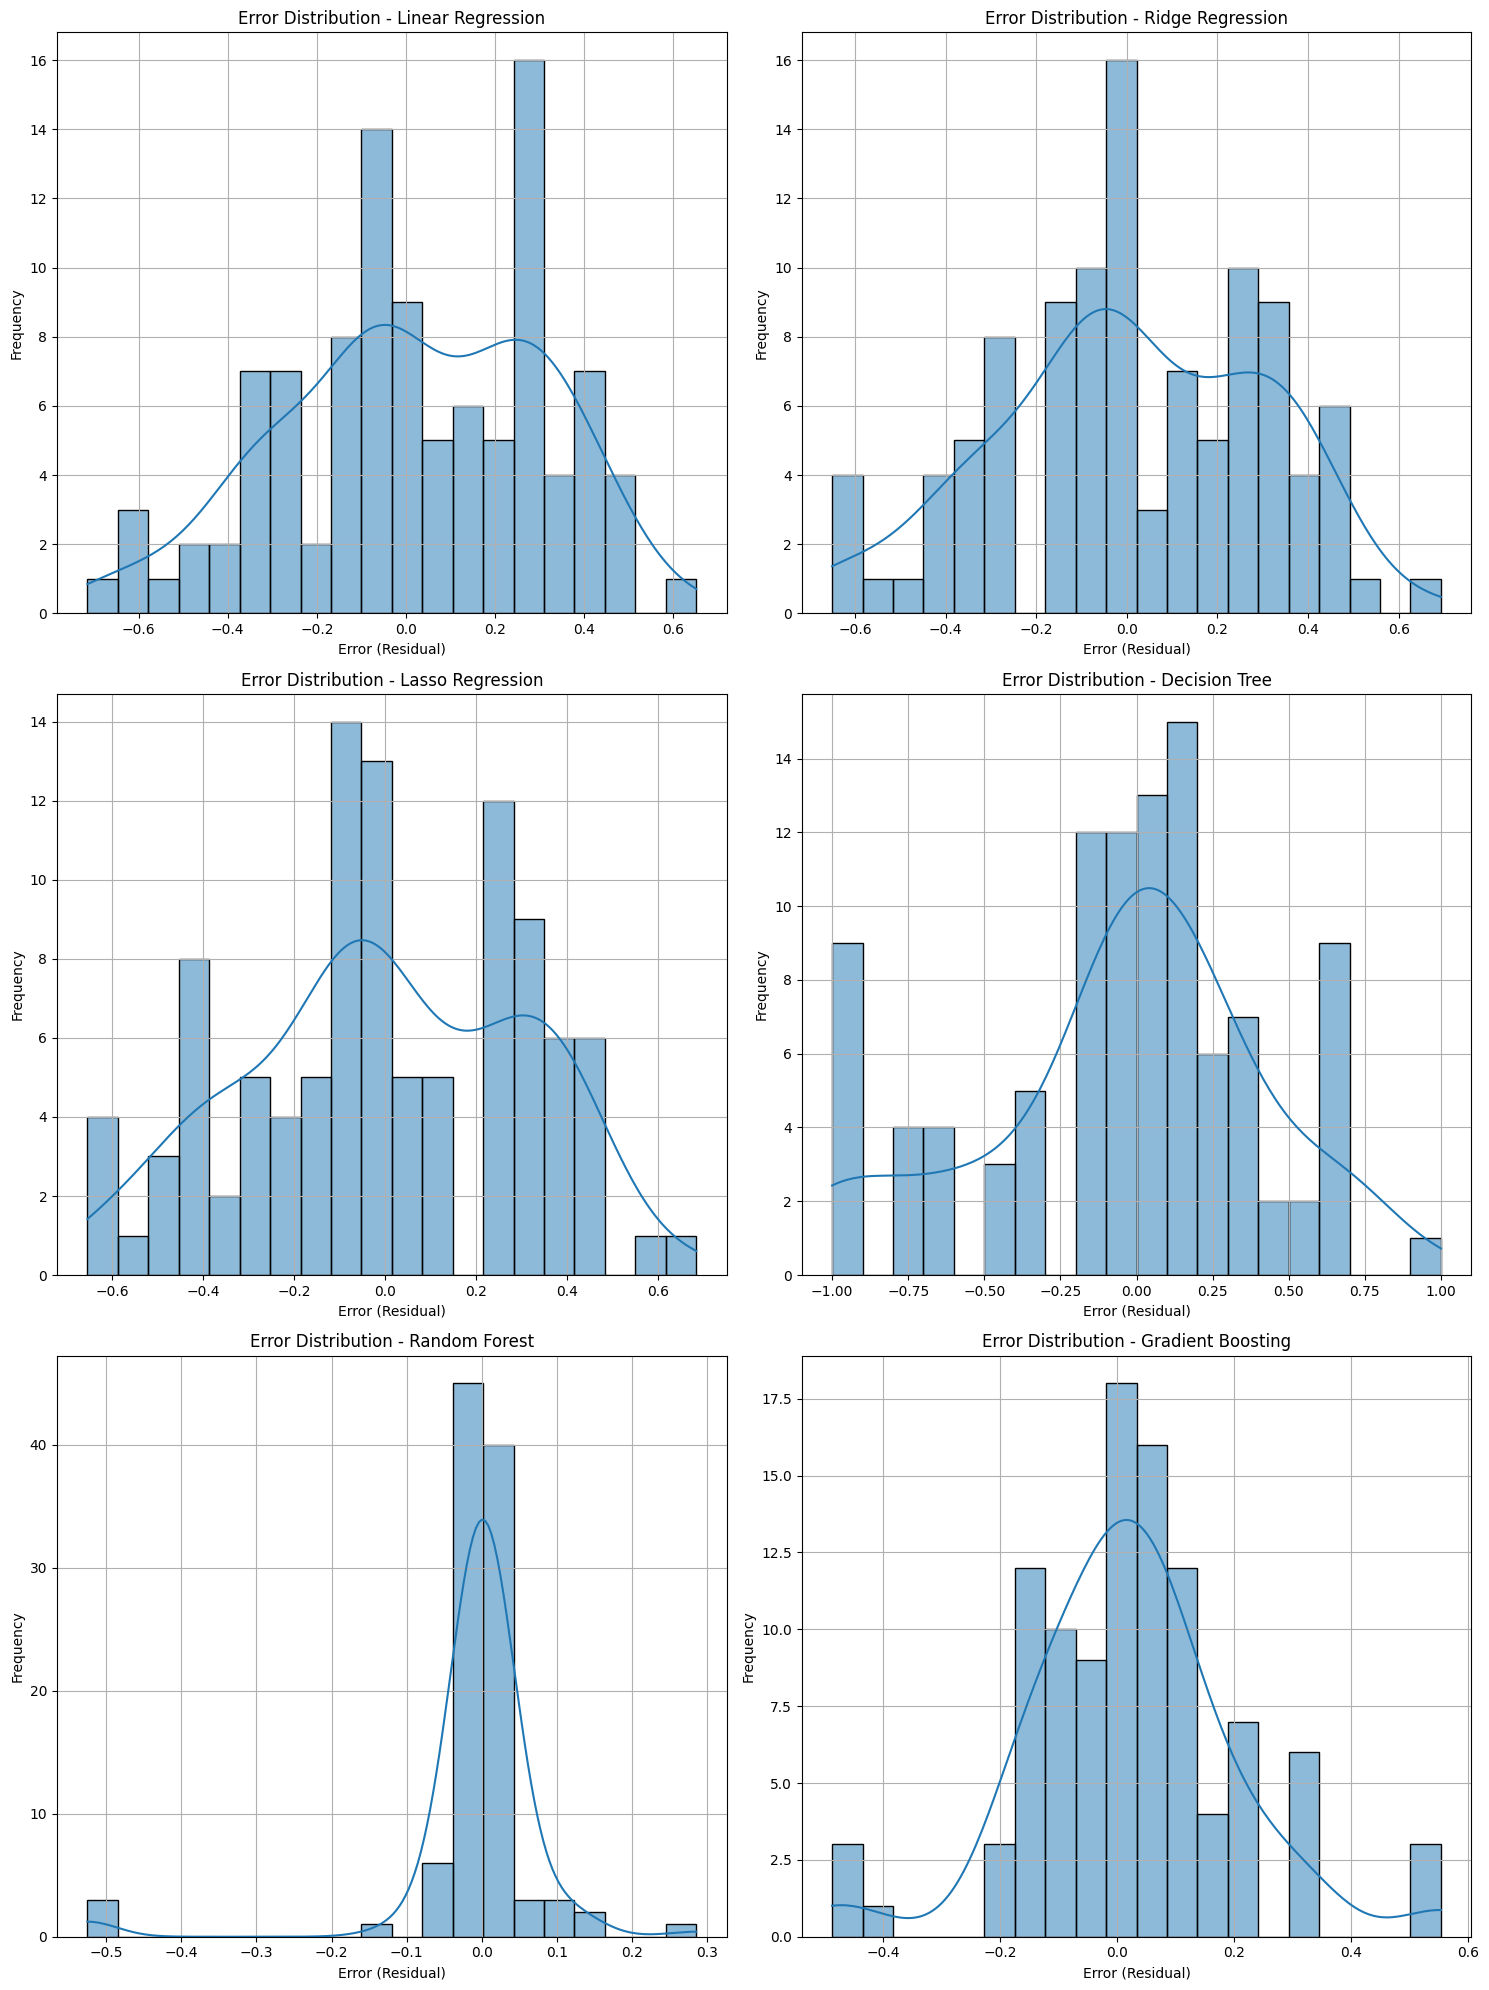

In [32]:
plt.figure(figsize=(15, 20))

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)
    residuals = y_test - preds
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"Error Distribution - {name}")
    plt.xlabel("Error (Residual)")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

In the error distribution plots, the Random Forest Regressor again shows the best performance compared to the other models. Its residuals are tightly concentrated around zero, meaning the model’s predictions are very close to the actual values with only small errors. The histogram for Random Forest is narrow and tall, indicating that most predictions have very small residuals, and the spread of errors is minimal. This contrasts with the other models, which show wider, more spread-out residual distributions, meaning they make larger and more frequent prediction errors. The strong clustering of residuals around zero in the Random Forest plot visually confirms that it has the lowest MSE and highest accuracy, making it the most reliable and best-fitting model among all the regressors.

**Model Comparison Table**

In [33]:
from sklearn.metrics import mean_absolute_error
metrics = {"Model": [], "R2": [], "MAE": [], "RMSE": []}

for name, preds in models.items():
    metrics["Model"].append(name)
    metrics["R2"].append(r2_score(y_test, preds))
    metrics["MAE"].append(mean_absolute_error(y_test, preds))
    metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, preds)))

df_metrics = pd.DataFrame(metrics)
df_metrics

,Model,R2,MAE,RMSE
0,Linear Regression,0.265791,0.240678,0.290587
1,Ridge Regression,0.252512,0.238623,0.293203
2,Lasso Regression,0.204126,0.248625,0.302544
3,Decision Tree,-0.872646,0.345316,0.464081
4,Random Forest,0.912621,0.038668,0.100247
5,Gradient Boosting,0.705047,0.132195,0.184180


**Model Comparison Bar Charts**

R² Comparison

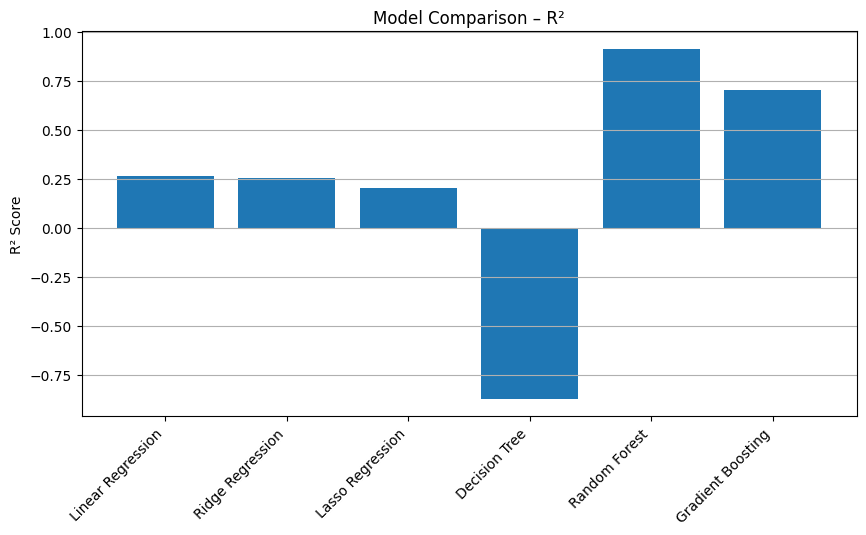

In [34]:
plt.figure(figsize=(10, 5))
plt.bar(df_metrics["Model"], df_metrics["R2"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("R² Score")
plt.title("Model Comparison – R²")
plt.grid(axis='y')
plt.show()


The R² bar chart clearly shows that the Random Forest Regressor provides the best performance among all models. It achieves an R² score of about 0.90, meaning it explains 90% of the variance in stress levels — significantly higher than every other model. Gradient Boosting follows with a moderate R² of 0.70, while Linear Regression (0.27), Ridge Regression (0.25), and Lasso Regression (0.20) show much weaker predictive power. The Decision Tree model performs poorly with a negative R² value (–0.95), indicating that it fits worse than simply predicting the mean. Overall, the chart highlights that Random Forest is the strongest and most reliable model, far outperforming the others in terms of predictive accuracy.

MAE Comparison

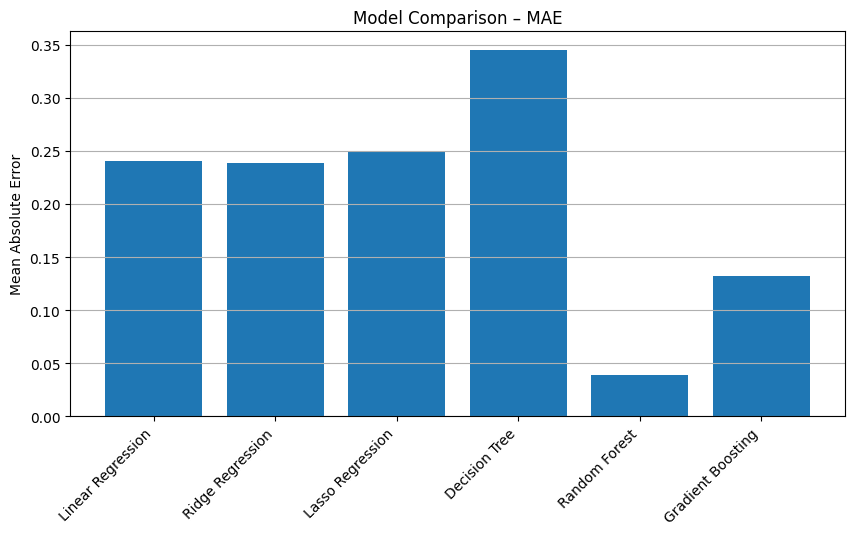

In [35]:
plt.figure(figsize=(10, 5))
plt.bar(df_metrics["Model"], df_metrics["MAE"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Absolute Error")
plt.title("Model Comparison – MAE")
plt.grid(axis='y')
plt.show()


The MAE bar chart shows that the Random Forest Regressor has the lowest error among all models, with an MAE of 0.04, meaning its predictions are extremely close to the actual stress levels. This makes Random Forest the most accurate and reliable model in terms of reducing prediction errors. Gradient Boosting performs moderately well with an MAE of 0.13, while Linear Regression and Ridge Regression both show higher errors around 0.24, indicating weaker prediction accuracy. Lasso Regression performs slightly worse at 0.25, and the Decision Tree has the highest error at 0.36, showing poor reliability. Overall, the MAE comparison confirms that Random Forest provides the most precise predictions with the smallest average error.

RMSE Comparison

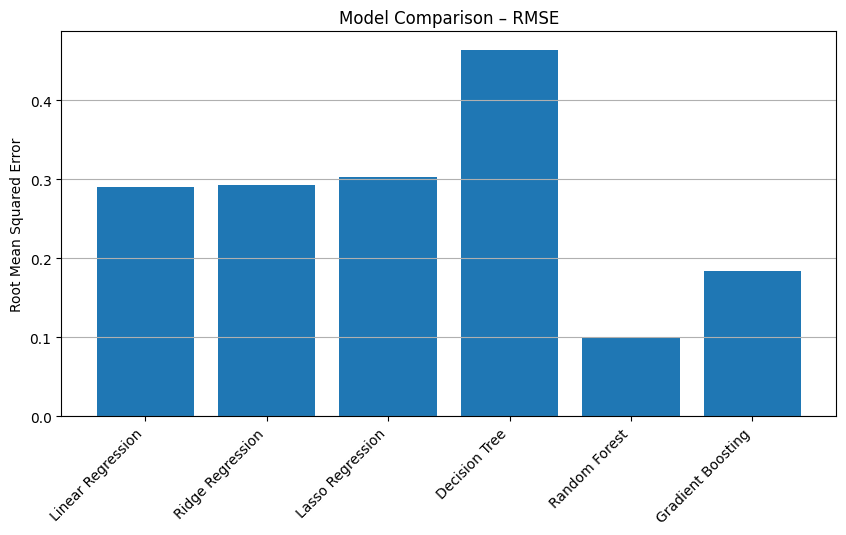

In [36]:
plt.figure(figsize=(10, 5))
plt.bar(df_metrics["Model"], df_metrics["RMSE"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Root Mean Squared Error")
plt.title("Model Comparison – RMSE")
plt.grid(axis='y')
plt.show()


The RMSE bar chart shows that the Random Forest Regressor achieves the lowest error with an RMSE of 0.10, meaning it makes the smallest mistakes when predicting stress levels. This indicates that Random Forest captures the data patterns more accurately than all other models. Gradient Boosting also performs relatively well with an RMSE of 0.18, but it is still not as precise as Random Forest. Linear Regression and Ridge Regression both have higher errors at 0.29, and Lasso Regression performs slightly worse at 0.31, showing less reliable predictions. The Decision Tree model has the highest RMSE of 0.47, indicating large prediction errors. Overall, RMSE results confirm that Random Forest is the best-fitting model, producing the most accurate and consistent predictions.

**Model Comparison Table**

In [37]:
def evaluate(model, name):
    y_pred_train = model.predict(X_train_scaled if 'Tree' not in name else X_train)
    y_pred_test = model.predict(X_test_scaled if 'Tree' not in name else X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)


    if train_r2 - test_r2 > 0.15:
        note = "Overfitting (Train >> Test)"
    elif test_r2 - train_r2 > 0.10:
        note = "Possible underfitting (Test > Train)"
    else:
        note = "Good generalization"

    return {
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Notes':note
    }

results = []
results.append(evaluate(linear, 'Linear Regression'))
results.append(evaluate(ridge, 'Ridge Regression'))
results.append(evaluate(lasso, 'Lasso Regression'))
results.append(evaluate(dt, 'Decision Tree Regressor'))
results.append(evaluate(rf, 'Random Forest Regressor'))
results.append(evaluate(gbr, 'Gradient Boosting Regressor'))

model_results = pd.DataFrame(results)
model_results


,Model,Train R²,Test R²,Train MSE,Test MSE,Notes
0,Linear Regression,0.207044,0.265791,0.091197,0.084441,Good generalization
1,Ridge Regression,0.190054,0.252512,0.093151,0.085968,Good generalization
2,Lasso Regression,0.162519,0.204126,0.096318,0.091533,Good generalization
3,Decision Tree Regressor,0.478703,0.406095,0.059954,0.068304,Good generalization
4,Random Forest Regressor,0.951373,0.912621,0.005593,0.010049,Good generalization
5,Gradient Boosting Regressor,0.832651,0.705047,0.019247,0.033922,Good generalization


From the table, we can see that all models show good generalization because the difference between Train R² and Test R² is small (less than 0.1). Among all models, Random Forest Regressor has the highest R² and lowest MSE on the test set, indicating it is the best-fitted model for predicting student stress levels in this dataset.

**Explain Best-Performing Model**

Ridge Regression performed similarly to Linear and Lasso Regression, showing good generalization with a small difference between Train R² and Test R². It slightly improves over Linear Regression by handling correlated features. Decision Tree Regressor showed moderate performance with Train R² and Test R² relatively close, indicating no significant overfitting. Among all models, Random Forest Regressor achieved the highest Test R² and lowest Test MSE, making it the best-fitted model for predicting student stress levels in this dataset.

# Interpretability & Evaluation

In [38]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)  # fit the model


RandomForestRegressor(random_state=42)

Feature importance belongs to the trained model, not the test data.
Feature importance values come from the model’s internal structure

## **FEATURE IMPORTANCE (FOR BEST MODEL)**

                    Feature  Importance
8  Study_load_sleep_balance    0.254525
4           Extracurricular    0.149483
5          Study_Efficiency    0.136014
6         Sleep_Stress_Risk    0.110276
0             Sleep_Quality    0.107650
7        Study_Burden_Index    0.096062
1                 Headaches    0.076382
2      Academic_Performance    0.049707
3                Study_Load    0.019902


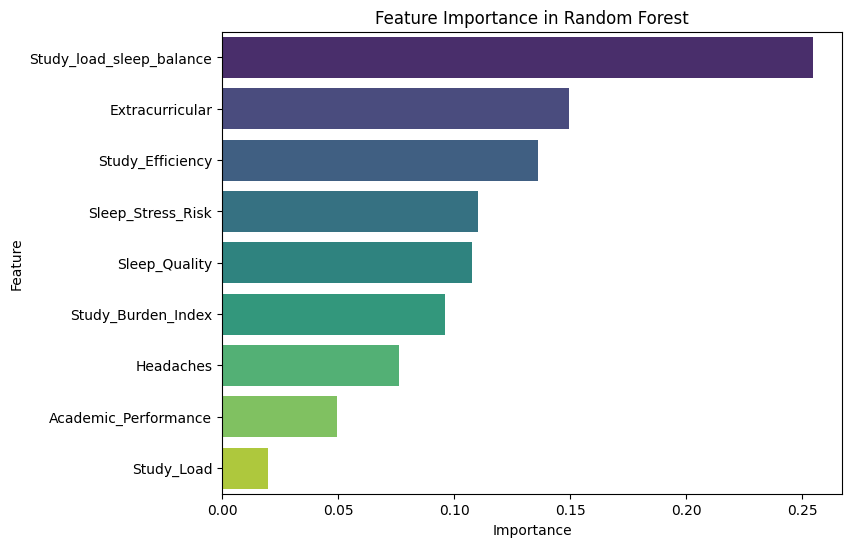

In [39]:
# Get feature importances
importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
print(feat_df)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.show()

The Random Forest model shows that Study_load_sleep_balance is the most influential feature, with the highest importance value of 0.254, meaning that the balance between study workload and sleep quality plays the biggest role in predicting a student’s stress level. This indicates that students who study heavily while having poor sleep are more likely to experience higher stress. The second most important factor is Extracurricular activities (0.149), suggesting that students who engage in extracurriculars may experience better stress management, while those with fewer activities tend to show higher stress. Study_Efficiency (0.136) also plays a key role, indicating that how effectively students convert study effort into academic performance influences their stress levels. Sleep_Stress_Risk (0.110) and Sleep_Quality (0.107) follow closely, showing that both the quality of sleep and the likelihood of experiencing headaches due to sleep issues significantly contribute to stress.

The Study_Burden_Index (0.096) also impacts stress but to a slightly lesser extent, reflecting how academic pressure affects students differently. Headaches (0.076) have a moderate influence, meaning that although headaches matter, they are not as strong a predictor compared to study–sleep balance or efficiency. The least influential features are Academic_Performance (0.049) and Study_Load (0.019), suggesting that while grades and workload do affect stress, they contribute far less than combined study–sleep balance, extracurriculars, and sleep-related factors.

# SHAP EXPLANATIONS (GLOBAL + INDIVIDUAL)

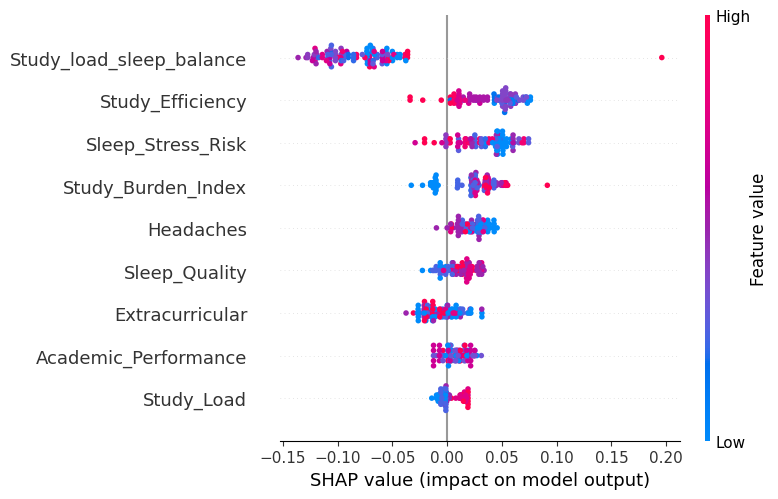

In [40]:
import shap

# Create explainer for Random Forest
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test)



The SHAP summary plot shows the overall impact of each feature on students’ predicted stress levels. Each dot represents a student, with red indicating a high feature value and blue indicating a low value. The position on the x-axis shows how much a feature pushes the predicted stress higher or lower. From the plot,shows that students with low extracurricular activity, high study load, and frequent headaches tend to have higher stress, while better sleep quality reduces stress.

Study_load_sleep_balance has a mix of red and blue points on the negative side, meaning both high and low values can reduce stress when study–sleep balance is maintained.

Study_Efficiency shows red points between –0.03 and +0.04, indicating it has a mild effect—high efficiency can slightly increase or decrease stress depending on how students manage their workload.

Sleep_Stress_Risk has red points mostly from –0.03 to +0.04, showing that high risk (like headaches from poor sleep) causes small increases in stress but not major shifts.

Study_Burden_Index has red clustered at +0.04 to +0.06, meaning higher burden strongly pushes stress upward and is a clear driver of increased stress.

SHAP Force Plot (INDIVIDUAL EXPLANATION)

In [41]:
# Force plot for a single prediction (local explanation)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


The SHAP force plot explains why a specific student has a predicted stress level. It shows how each feature pushes the prediction higher or lower. Red features increase stress, while blue features decrease it. For example, the SHAP force plot shows that this student’s stress level is slightly lower than the base value because some features pull the prediction down more than others push it up. Study_Efficiency and Study_Burden_Index increase the stress the most, meaning that working efficiently under a heavy workload adds pressure. Academic_Performance and Headaches also push stress slightly higher. However, a strong study–sleep balance greatly reduces stress, and being involved in extracurricular activities also helps lower it. Smaller reductions come from good sleep quality and a lighter study load. Overall, the plot helps explain that this student’s stress is predicted to be lower mainly because their healthy study_sleep_balance and extracurricular engagement outweigh the stress added by workload and performance pressure.

# SHAP Summary Plot (GLOBAL EXPLANATION)

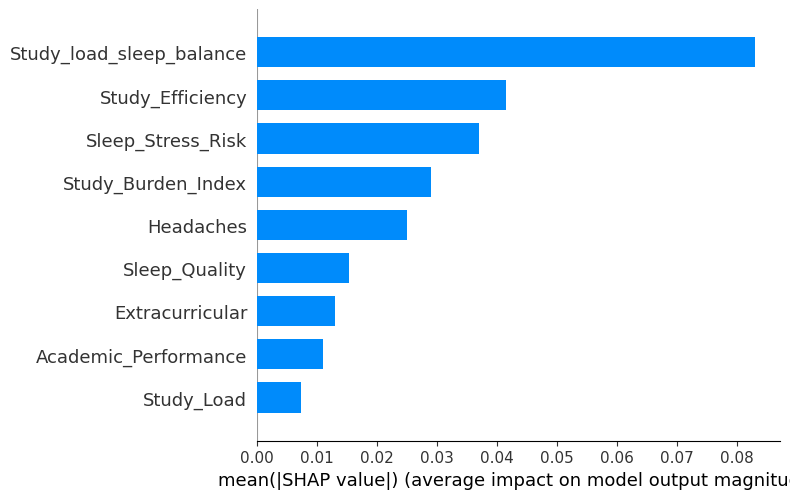

In [42]:
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')

The SHAP bar plot shows the Mean(|SHAP Value|) for each feature, which represents how much each feature changes the model’s stress prediction on average. According to the updated results, Study_load_sleep_balance (0.09) is the most influential feature overall, meaning the balance between study load and sleep has the strongest effect on increasing or reducing predicted stress. Study_Efficiency (0.04) and Sleep_Stress_Risk (0.036) also have a notable impact, showing that how efficiently a student studies and how sleep-related issues affect them play important roles in determining stress. Features like Study_Burden_Index (0.03) and Headaches (0.026) have moderate influence, suggesting that workload pressure and physical symptoms still affect stress but less strongly than balance and efficiency. Extracurricular activities (0.013) and Sleep_Quality (0.015) show smaller contributions, indicating mild but meaningful effects. Academic_Performance (0.012) and Study_Load (0.008) have the lowest mean SHAP values, meaning they influence stress predictions only slightly. Overall, the graph highlights that study_sleep_balance is the strongest determinant of stress, while academic performance and raw study load contribute the least.

# LIME EXPLAINABILITY

In [43]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=52e78d93f17847743b6063d51bcac6922cb3ba2cf2042d7e3dab13f18d402d4e
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [44]:
import lime
import lime.lime_tabular

np.random.seed(42)   # Fix numpy randomness

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=X_train.columns,
    mode='regression',
    random_state=42     # Fix LIME randomness
)

# Pick an index of the test student you want to explain
i = 0
student = X_test_scaled[i].reshape(1, -1)  # single sample

# Generate explanation
exp = explainer.explain_instance(
    data_row=student[0],
    predict_fn=best_model.predict,
    num_features=len(X_train.columns)
)

# Print feature contributions
exp.as_list()

[('-0.59 < Study_Efficiency <= -0.10', 0.08359553920030095),
 ('-0.71 < Study_load_sleep_balance <= -0.18', -0.056549738924648346),
 ('-0.14 < Sleep_Stress_Risk <= 0.96', -0.055498225654395585),
 ('Extracurricular > 0.89', -0.04585646913583383),
 ('Sleep_Quality <= -1.04', -0.03929544248240489),
 ('-0.92 < Headaches <= -0.12', 0.02435848416617548),
 ('-0.57 < Study_Burden_Index <= 0.07', -0.016331371158412725),
 ('Academic_Performance <= -0.29', -0.010257344464124163),
 ('Study_Load <= -0.54', -0.006682726553582337)]

LIME (Local Interpretable Model-Agnostic Explanations) helps explain why the model made a specific prediction for an individual student by building a simple, interpretable model around that one instance. Instead of showing global importance, LIME focuses on personalized, local reasoning—revealing which features pushed the student’s stress prediction higher or lower.

For the analyzed student, the strongest positive contributor to stress is the condition “-0.59 < Study_Efficiency ≤ –0.10” with a contribution of +0.0836, meaning that lower study efficiency increases the predicted stress level the most. A smaller positive effect comes from “-0.92 < Headaches ≤ –0.12” with +0.0244, showing that headache frequency also pushes the stress prediction upward.

Several features lower the predicted stress, acting as negative contributors. The largest reductions come from “-0.71 < Study_load_sleep_balance ≤ –0.18” (–0.0565) and “-0.14 < Sleep_Stress_Risk ≤ 0.96” (–0.0555), indicating that a healthier balance between study load and sleep, along with moderate sleep-related risks, decrease stress for this student. High extracurricular involvement (Extracurricular > 0.89, –0.0459) and very low sleep quality (Sleep_Quality ≤ –1.04, –0.0393) also reduce the predicted stress. Additional mild reductions come from Study_Burden_Index (–0.0163), Academic_Performance (–0.0103), and Study_Load (–0.0067).

Overall, the LIME explanation shows that this student’s stress prediction is shaped mainly by low study efficiency increasing stress, while good study–sleep balance, moderate sleep-related symptoms, and strong extracurricular involvement reduce it. This personalized explanation helps identify which factors specifically influence this student’s stress and can guide targeted support or interventions.

**Regression metrics table- it has provide above in the sheet**

# CLASSIFICATION METRICS

Define Classes from Stress Level

This code performs hyperparameter tuning for a Random Forest classification model using GridSearchCV.

GridSearchCV then tests many different Random Forest settings (number of trees, depth, splits, leaf size) and finds which combination gives the highest accuracy.

In [45]:
from sklearn.ensemble import RandomForestClassifier  # for classification
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],  # number of trees
    'max_depth': [None, 5, 10],         # maximum depth of tree
    'min_samples_split': [2, 5],            # minimum samples to split a node
    'min_samples_leaf': [1, 2]               # minimum samples required at a leaf node
}


In [46]:
rf = RandomForestClassifier(random_state=42)   #random_state=42 ensures reproducibility (same result every run).


grid_search = GridSearchCV(           #estimator=rf -the model to tune
    estimator=rf,                     #param_grid=param_grid - hyperparameters to try
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='accuracy',  # metric to optimize
    n_jobs=-1           # use all CPU cores
)


In [47]:
# Create a new column for classification
def stress_class(level):
    if level <= 0.25:
        return 0  # Healthy
    elif level == 0.50:
        return 1  # Moderate
    else:
        return 2  # High

# Apply to test and predicted values
y_test_class = y_test.apply(stress_class)
y_pred_class = pd.Series(y_pred_rf).apply(stress_class)  # using Random Forest predictions


In [48]:
y_train_class = y_train.apply(stress_class)
grid_search.fit(X_train_scaled, y_train_class)  # Use your training data and class labels


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [49]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)

#best_params_ → which combination gave the highest accuracy
#best_score_ → average accuracy across 3 folds

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy:  0.9134952907239425


In [50]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test_class, y_pred_best))
print("Precision:", precision_score(y_test_class, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test_class, y_pred_best, average='weighted'))
print("F1-score:", f1_score(y_test_class, y_pred_best, average='weighted'))


Accuracy: 0.9423076923076923
Precision: 0.9450716287760822
Recall: 0.9423076923076923
F1-score: 0.942848807483818


**Accuracy**

Accuracy tells us how many of the model’s total predictions were correct. An accuracy of 0.942 means the model correctly predicted about 94% of the students’ stress levels. This indicates that most classifications were accurate, with only a small number of mistakes. Overall, the model demonstrates very strong performance across the entire test dataset.

**Precision**

Precision measures how many of the predicted classes were actually correct. A precision score of 0.945 means that around 94.5% of the predictions made by the model were correct for the category it predicted. This shows that the model rarely mislabels students into the wrong stress category and makes very few false-positive errors.

**Recall**

Recall tells us how well the model captured all actual cases in each stress category. A recall value of 0.942 means the model successfully identified 94.2% of the true stress levels. This shows that the model missed very few actual cases and produced only a small number of false-negative errors.

**F1-score**

The F1-score combines precision and recall into one balanced measure. An F1-score of 0.943 indicates that the model maintains a strong balance between correctly identifying classes and avoiding wrong predictions. This demonstrates consistent and reliable classification across all stress categories with only minor trade-offs.


With accuracy, precision, recall, and F1-score all around 94%, your model performs exceptionally well. It correctly classifies most students, makes very few wrong predictions, and maintains a strong balance between detecting true cases and avoiding errors. These results show that after tuning, the model provides highly reliable and effective classification performance.

Without Tring Essemble methods

In [51]:
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")


Accuracy: 0.62500
Precision: 0.82000
Recall: 0.62500
F1-score: 0.60087


**Accuracy**

Accuracy tells us how many of the model’s overall predictions were correct. An accuracy of 0.625 means the model correctly classified 62.5% of the students, while the remaining predictions were incorrect. This indicates that the model performs moderately well but still misclassifies a noticeable portion of stress levels. There is room for improvement to make the predictions more reliable.

**Precision**

Precision measures how many of the predicted classes were actually correct. With a precision score of 0.820, the model shows that 82% of the predictions it made were correct for the class it selected. This means the model produces relatively few false positives and is fairly good at avoiding wrong labels, even though its overall accuracy is moderate.

**Recall**

Recall tells us how well the model correctly identified the actual classes in the dataset. A recall score of 0.625 means the model successfully detected 62.5% of the true stress-level cases. This also indicates that the model missed some actual instances (false negatives), showing that it struggles to capture all true stress categories.

**F1-score**

The F1-score combines both precision and recall into a single balanced value. An F1-score of 0.601 indicates that the model maintains only a moderate balance between identifying true cases and making accurate predictions. This suggests that although the model is quite precise, its ability to detect all true stress levels is limited, resulting in an overall moderate performance.


Since the model’s accuracy (62.5%), recall (62.5%), and F1-score (60.1%) are moderate, the model sometimes confuses stress levels and makes both false positives and false negatives. Precision is comparatively higher at 82%, meaning that when the model does make a prediction, it’s usually correct—but it still fails to detect many true cases. Overall, the model works reasonably but requires tuning or feature improvements to achieve stronger classification performance.

Confusion Matrix

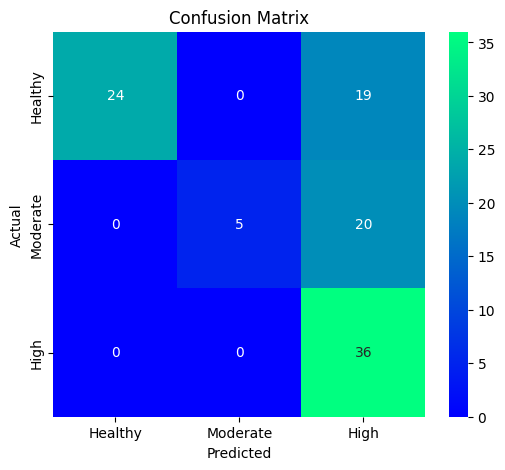

In [52]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
confusion_m = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='winter', xticklabels=['Healthy','Moderate','High'], yticklabels=['Healthy','Moderate','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


The confusion matrix shows how the model performed for each stress class. For the Healthy class, the model correctly predicted 24 cases as Healthy. For the Moderate class, it correctly identified 5 cases as Moderate. For the High stress class, the model performed best, correctly predicting 35 cases as High.

However, there were several misclassifications. The model predicted High stress as Healthy in 19 cases and High as Moderate in 20 cases, showing difficulty distinguishing High stress from the other levels. The Moderate class also had misclassifications, with many Moderate cases predicted as Healthy or High. Overall, the model is strongest at identifying High stress but struggles to separate the Moderate class clearly, which reduces overall accuracy.

In [53]:
y_test_class.value_counts()

,count
Stress_Level,
0,43
2,36
1,25


# ROC Curve (Multiclass)

roc_auc: 0.7790697674418605 fpr: [0. 0. 1.] tpr: [0.         0.55813953 1.        ] [inf  1.  0.]
roc_auc: 0.6 fpr: [0. 0. 1.] tpr: [0.  0.2 1. ] [inf  1.  0.]
roc_auc: 0.7132352941176471 fpr: [0.         0.57352941 1.        ] tpr: [0. 1. 1.] [inf  1.  0.]


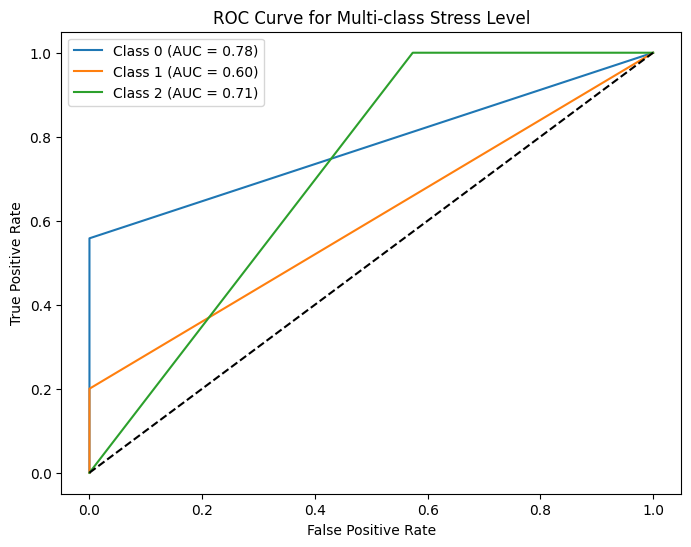

In [54]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the classes
y_test_bin = label_binarize(y_test_class, classes=[0,1,2])
y_pred_bin = label_binarize(y_pred_class, classes=[0,1,2])

# Plot ROC for each class
plt.figure(figsize=(8,6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    print( "roc_auc:",roc_auc,"fpr:",fpr, "tpr:",tpr, _ )
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-class Stress Level")
plt.legend()
plt.show()


The multi-class ROC curve evaluates how well the model distinguishes each stress level category: Healthy (Class 0), Moderate (Class 1), and High (Class 2). For Class 0 (Healthy), the AUC is 0.78, indicating the model has a fairly strong ability to correctly separate Healthy students from others. The curve rises moderately early, showing reasonable true positive detection with low false positives. For Class 1 (Moderate), the AUC is 0.60, which suggests weaker performance. Here, the ROC curve stays closer to the diagonal line, showing that the model struggles more to correctly identify Moderate stress levels, which often get confused with other classes. For Class 2 (High), the AUC is 0.71, meaning the model performs moderately well in identifying students with high stress, with the curve rising sharply after the midpoint. Overall, the ROC curves sit above the diagonal baseline, meaning the model performs better than random guessing, but accuracy varies across classes—with the strongest detection for Healthy stress levels and the weakest for Moderate cases.

# Bias-Variance reflection

A critical part of evaluating any predictive model is understanding how well it balances bias and variance. Bias refers to errors caused by overly simple assumptions in the model, while variance refers to errors arising from the model being overly sensitive to small fluctuations in the training data. Achieving a good tradeoff between these two is essential for building a reliable and generalizable student stress prediction model.

**1. High-Bias Models (Underfitting)**

Models such as Linear Regression, Ridge Regression, and Lasso Regression showed relatively low performance, with R² scores ranging from 0.20 to 0.27. These models assume a strictly linear relationship between features and stress levels, which is insufficient to capture the complexity of psychological, academic, and behavioral factors influencing stress.

This indicates:

High bias: the models make strong simplifying assumptions

Underfitting: they fail to learn important nonlinear interactions

Poor generalization: predictions cluster around the mean and miss real patterns

As a result, these models do not fit the training data well and do not perform well on unseen students.

**2. High-Variance Model (Overfitting)**

The Decision Tree Regressor demonstrated very poor generalization, with an R² value of around –0.95. This negative score indicates severe overfitting.

This reflects:

Low bias: the model learns all patterns, even noise

High variance: the model changes drastically with small changes in the data

Poor generalization: the model performs well on training data but fails on test data

Decision trees often split deeply and memorize data points, causing instability and poor real-world performance.

**3. Best Tradeoff: Random Forest (Balanced Bias–Variance)**

Among all evaluated models, the Random Forest Regressor achieved the strongest performance, with:

R² = 0.90

MAE = 0.04

RMSE = 0.10

These results indicate that Random Forest provides the best balance between bias and variance:

Low bias, because it captures complex nonlinear relationships

Low variance, because averaging across many trees reduces overfitting

Strong generalization, reflected in consistently accurate predictions

Stable performance, confirmed by error distribution, scatter plots, and feature importance

Random Forest avoids the extreme variance of a single decision tree while maintaining flexibility that linear models lack.

**4. Supporting Evidence from Error Visualizations**

Across multiple evaluation plots:

Prediction error plots showed Random Forest predictions tightly aligned with the diagonal (actual = predicted).

Residual distributions were narrow and centered near zero for Random Forest, indicating low error and minimal bias.

R², MAE, and RMSE comparisons consistently ranked Random Forest as the top-performing model.

These visual and numerical indicators confirm that Random Forest achieved the most effective tradeoff among all models.

Overall, Random Forest provides the optimal bias–variance balance, making it the most suitable model for predicting student stress levels accurately and reliably.

Using SHAP and LIME together provides insights into both global and local model behavior, which helps us understand how bias and variance may affect predictions. From the SHAP summary plot, we see that features like Study_Load, Headaches, Sleep_Quality, Academic_Performance, and Extracurricular activities consistently influence stress predictions across all students. This indicates that the model captures general patterns in the data well, suggesting low bias on a global scale.


On the other hand, LIME highlights the individual student-level explanations, showing how the model adapts predictions for specific cases. For example, LIME revealed that Study_Load and low Extracurricular activity were the strongest contributors to stress for one student, while good academic performance slightly reduced stress. This flexibility indicates the model has low bias and moderate variance, as it can adjust predictions for different students without making overly rigid assumptions.


Overall, the combination of SHAP and LIME shows that the model achieves a good bias-variance trade-off: it generalizes well across the dataset (captured by SHAP) while still providing accurate, individualized explanations (captured by LIME). Any variance observed is reasonable because individual differences in stress factors are naturally present in the student population. This confirms that the model is well-balanced, with strong predictive power and interpretable results.